In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic('pylab inline')
#get_ipython().magic('matplotlib auto')

pylab.rcParams['figure.figsize'] = (12, 8)
import sys


Populating the interactive namespace from numpy and matplotlib


#### The downloaded training data has 13,647,310 rows including header. It is quiet difficult to use my personal computer to do the analyses. So following Ike' suggestion, I reduce the input data to 20% of the original training data by randomly sampling the raw data. First generating indexes of lines for about 20% of the data.



In [2]:
#===randomly generate indexes for ~ 20 % of data 

#from random import sample
#n_sample = int(13647309*0.2)
#indexes = sample(range(13647309), k=n_sample)
#with open('indexes_20_percent.txt', 'w') as f:
#     for s in indexes:
#        f.write(str(s) + '\n')

#### Generating input data by taking 20 % of the training data 

In [3]:
#===generate 20 % training data based on randomly generated indexes

#f_ind = open('indexes_20_percent.txt','r')
#f = open('input/train_ver2.csv','r')

#row_number = []
#with open('indexes_20_percent.txt','r') as f_ind:
#    for line in f_ind:
#       row_number.append(int(line.strip()))

#row_number.sort()
#print(type(row_number))

#ofile  = open('input/train_subset.csv', 'wb')

#lines = f.readlines()
#num_lines = len(lines)

##randomly generated indexes has header line
##ofile.write(lines[0])
#for i in row_number:
#    ofile.write(lines[i])

#f.close()
#f_ind.close()
#ofile.close()



#### Original dataset has Spanish header, I recast the Spainish header to English header so I can understand better.

In [4]:
#===write a csv with English header (easy to understand)
# df = pd.read_csv('input/train_subset.csv',encoding = 'ISO-8859-1') 
# df = df.rename(index=str, columns={'fecha_dato': 'date', 'ncodpers': 'id','ind_empleado':'employee_index',
# 'pais_residencia':'country_residence',
# 'sexo':'sex',
# 'fecha_alta':'first_join_date',
# 'ind_nuevo':'new_customer_index',
# 'antiguedad':'seniority',
# 'indrel':'primary',
# 'ult_fec_cli_1t':'last_date_primary',
# 'indrel_1mes':'customer_type',
# 'tiprel_1mes':'customer_relation',
# 'indresi':'residence_idx',
# 'indext':'foreigner_idx',
# 'conyuemp':'spouse_idx',
# 'canal_entrada':'channel',
# 'indfall':'deceased',
# 'tipodom':'address',
# 'cod_prov':'province_code',
# 'nomprov':'province_name',
# 'ind_actividad_cliente':'activity_idx',
# 'renta':'gross_income',
# 'segmento':'segment',
# 'ind_ahor_fin_ult1':'saving_account',
# 'ind_aval_fin_ult1':'guarantees',
# 'ind_cco_fin_ult1':'current_account',
# 'ind_cder_fin_ult1':'derivada_account',
# 'ind_cno_fin_ult1':'payroll_account',
# 'ind_ctju_fin_ult1':'junior_account',
# 'ind_ctma_fin_ult1':'mas_particular_account',
# 'ind_ctop_fin_ult1':'particular_account',
# 'ind_ctpp_fin_ult1':'particular_plus_account',
# 'ind_deco_fin_ult1':'short-term_deposits',
# 'ind_deme_fin_ult1':'medium-term_deposits',
# 'ind_dela_fin_ult1':'long-term_deposits',
# 'ind_ecue_fin_ult1':'e-account',
# 'ind_fond_fin_ult1':'funds',
# 'ind_hip_fin_ult1':'mortgage',
# 'ind_plan_fin_ult1':'pensions',
# 'ind_pres_fin_ult1':'loans',
# 'ind_reca_fin_ult1':'taxes',
# 'ind_tjcr_fin_ult1':'credit_card',
# 'ind_valo_fin_ult1':'securities',
# 'ind_viv_fin_ult1':'home_account',
# 'ind_nomina_ult1':'payroll',
# 'ind_nom_pens_ult1':'pensions_1',
# 'ind_recibo_ult1':'direct_debit'})
# df.to_csv('input/train_20percent.csv',index=False)


#### First check NAN and missing values.

In [5]:
#Option 1: df.isnull().any().any() - This returns a boolean value
#If you make it df.isnull().any(), you can find just the columns that have NaN values:
#df.isnull().any()
df = pd.read_csv('input/train_20percent.csv',encoding = 'ISO-8859-1')
df.isnull().sum()

C:\Users\WHsieh\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


date                             0
id                               0
employee_index                5454
country_residence             5454
sex                           5470
age                              0
first_join_date               5454
new_customer_index            5454
seniority                        0
primary                       5454
last_date_primary          2724464
customer_type                29573
customer_relation            29573
residence_idx                 5454
foreigner_idx                 5454
spouse_idx                 2729088
channel                      36790
deceased                      5454
address                       5455
province_code                18657
province_name                18657
activity_idx                  5454
gross_income                559126
segment                      37473
saving_account                   0
guarantees                       0
current_account                  0
derivada_account                 0
payroll_account     

#### There are too many misssing values for "last_date_primary", "spouse_idx" so these two fields are dropped.

In [6]:
df = df.drop(["last_date_primary", "spouse_idx"], axis=1) 

#### Age and seniority has non-numeric values. Use errors='coerce' to force them to be NaN so they can be removed.

In [7]:
df['age']   = pd.to_numeric(df['age'], errors='coerce')
df['seniority']   = pd.to_numeric(df['seniority'], errors='coerce')
#remove negative seniority
df=df[df['seniority']>0]
#save original df as df_save
df_save = df

In [31]:
#### checking how many rows of data
len(df)

2697458

#### I would like to know the content of each field. So uniq values for each field are printed.

In [8]:
# feature_cols =['date', 'id', 'employee_index', 'country_residence', 'sex', 'age',
#        'first_join_date', 'new_customer_index', 'seniority', 'primary',
#        'customer_type', 'customer_relation', 'residence_idx', 'foreigner_idx',
#        'channel', 'deceased', 'address', 'province_code', 'province_name',
#        'activity_idx', 'gross_income', 'segment']
feature_cols =['date','employee_index']
for ind, feature_col in enumerate(feature_cols):
    
    uniq_values = list(df[feature_col].unique())
    
    print("uniq values for "+feature_col+": ",uniq_values)
    print("number of uniq values for "+feature_col+": ",len(uniq_values))

('uniq values for date: ', [u'2015-01-28', u'2015-02-28', u'2015-03-28', u'2015-04-28', u'2015-05-28', u'2015-06-28', u'2015-07-28', u'2015-08-28', u'2015-09-28', u'2015-10-28', u'2015-11-28', u'2015-12-28', u'2016-01-28', u'2016-02-28', u'2016-03-28', u'2016-04-28', u'2016-05-28'])
('number of uniq values for date: ', 17)
('uniq values for employee_index: ', [u'N', u'A', u'F', u'B', u'S'])
('number of uniq values for employee_index: ', 5)


In [10]:
df.date.unique()

array([u'2015-01-28', u'2015-02-28', u'2015-03-28', u'2015-04-28',
       u'2015-05-28', u'2015-06-28', u'2015-07-28', u'2015-08-28',
       u'2015-09-28', u'2015-10-28', u'2015-11-28', u'2015-12-28',
       u'2016-01-28', u'2016-02-28', u'2016-03-28', u'2016-04-28',
       u'2016-05-28'], dtype=object)

In [23]:
id_set1 = list(df[df['date']=='2015-01-28'].id.unique())
id_set2 = list(df[df['date']=='2015-02-28'].id.unique())
print len(id_set1)
print len(id_set2)
(list(set(id_set1) & set(id_set2)))

123845
124488


[917507,
 917520,
 786449,
 1310749,
 1310753,
 1048613,
 786473,
 786478,
 786480,
 655412,
 1179702,
 1048644,
 1048648,
 917578,
 1048653,
 655441,
 1048659,
 1310815,
 655459,
 1048686,
 393333,
 1310848,
 131205,
 655495,
 1179785,
 393359,
 917650,
 655507,
 131221,
 393371,
 1310876,
 1048734,
 1310879,
 655521,
 776890,
 917673,
 917533,
 1310903,
 524473,
 262332,
 1179838,
 961227,
 524486,
 917537,
 655561,
 131275,
 917708,
 786637,
 917710,
 131282,
 1310942,
 1179872,
 1310946,
 393445,
 1310952,
 131313,
 1179897,
 131328,
 1310988,
 1310990,
 1310992,
 131345,
 786709,
 262431,
 830171,
 1179951,
 1311025,
 524598,
 1048895,
 1048902,
 917836,
 393551,
 1311058,
 131423,
 1180001,
 786786,
 131427,
 917877,
 786812,
 917887,
 1048967,
 917897,
 655764,
 257520,
 1048982,
 1180074,
 655787,
 524716,
 917941,
 917944,
 262585,
 1311170,
 1180110,
 917581,
 655828,
 131544,
 1049055,
 262630,
 1049063,
 262634,
 1049069,
 131569,
 1049077,
 918013,
 1049092,
 393740,
 1049

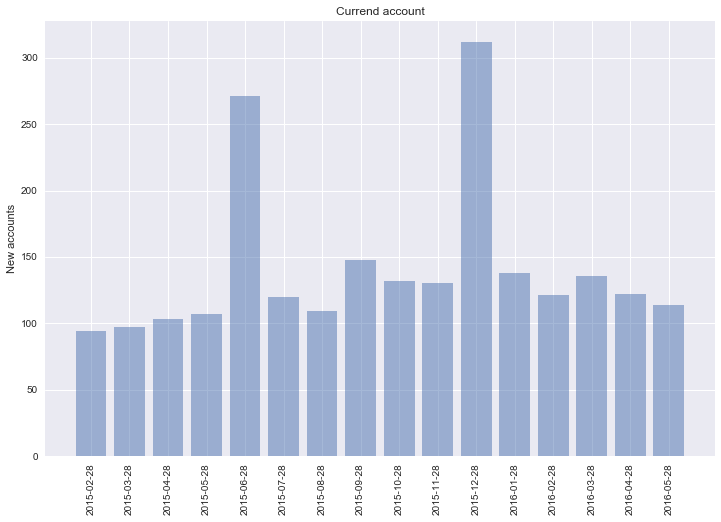

In [64]:
target_cols=["saving_account","guarantees","current_account","derivada_account","payroll_account","junior_account","mas_particular_account","particular_account","particular_plus_account","short-term_deposits","medium-term_deposits","long-term_deposits","e-account","funds","mortgage","pensions","loans","taxes","credit_card","securities","home_account","payroll","pensions_1","direct_debit"]
alldates=['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28',
       '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28',
       '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28',
       '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28',
       '2016-05-28']
for prod in target_cols:
new_accounts=[]
for i in range(len(alldates)-1):
    #print alldates[i],alldates[i+1]
    df_tmp1 = df[ (df['current_account']== 0) & (df['date']==alldates[i])]
    df_tmp2 = df[ (df['current_account']== 1) & (df['date']==alldates[i+1])]
    new_accounts.append(len(set(df_tmp2['id']) & set(df_tmp1['id'])))

#df_tmp1 = df[ (df['current_account']== 0) & (df['date']=='2015-01-28')]

y_pos = np.arange(len(alldates[1:]))

 
plt.bar(y_pos, new_accounts, align='center', alpha=0.5)
plt.xticks(y_pos, alldates[1:])
plt.xticks(rotation='vertical')
plt.ylabel('New accounts')
plt.title('Current account')
 
plt.show()

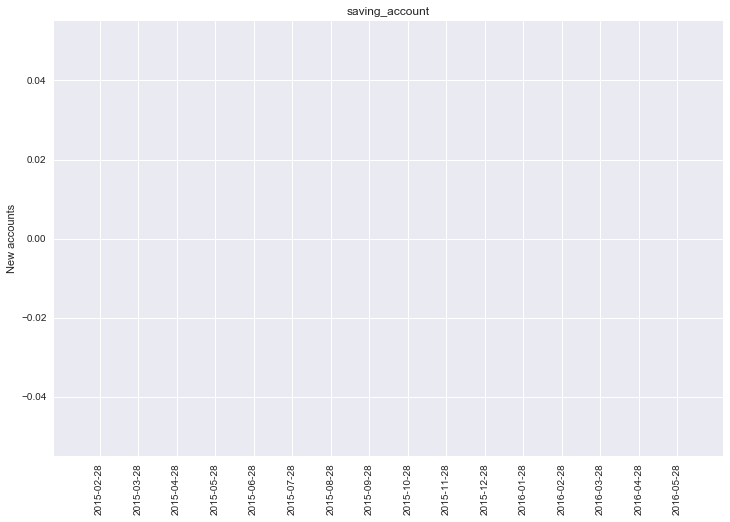

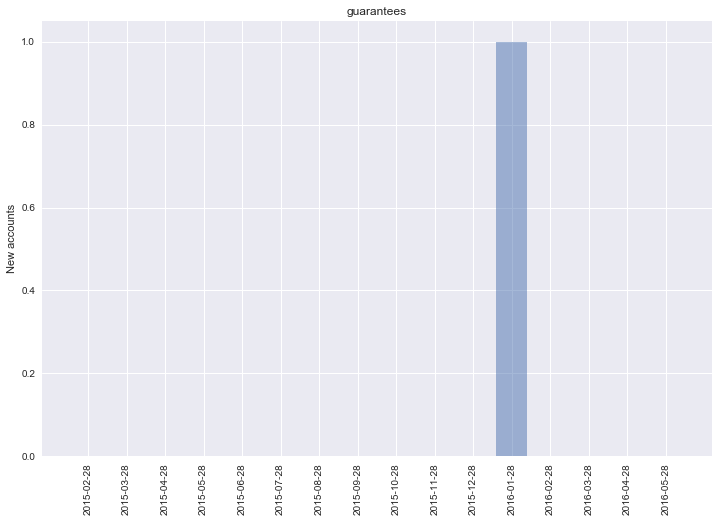

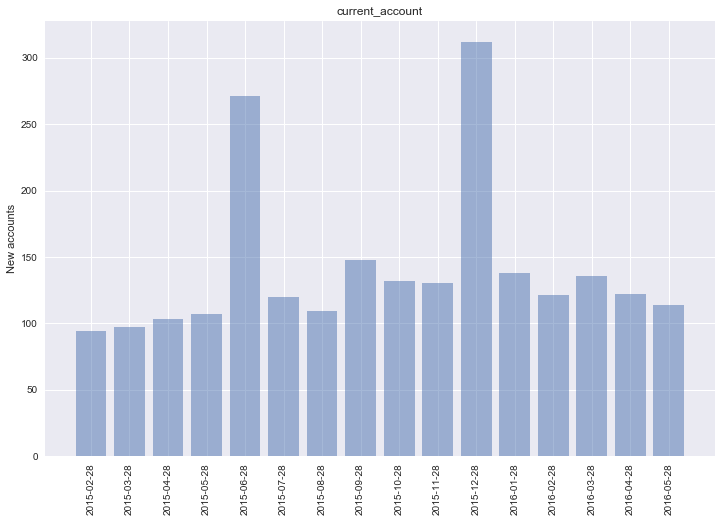

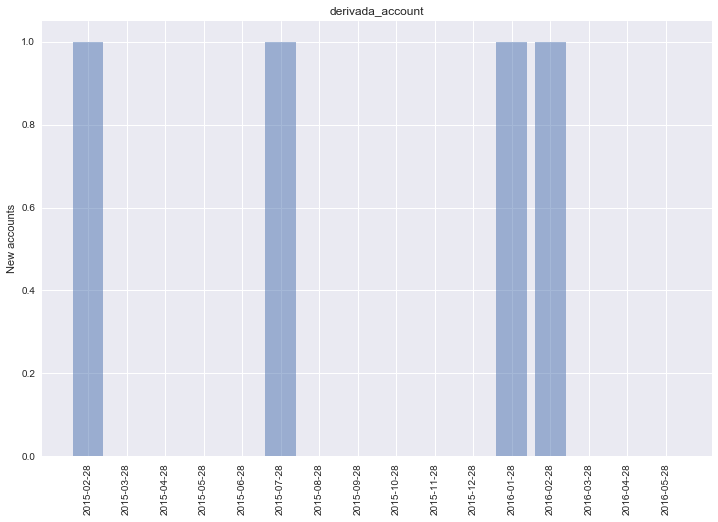

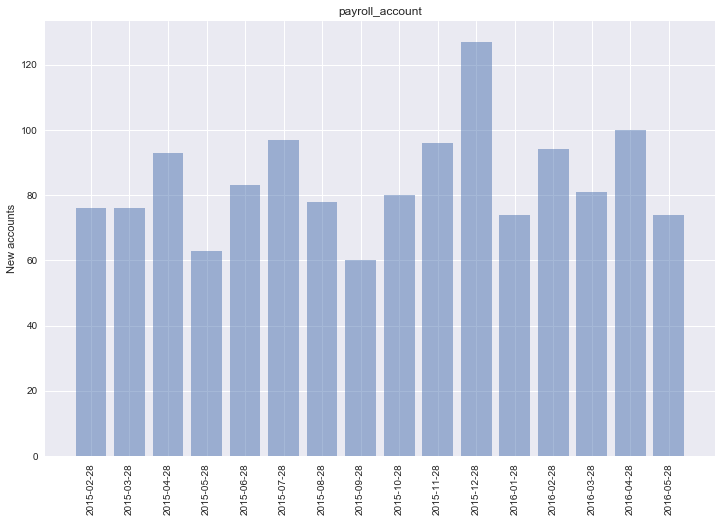

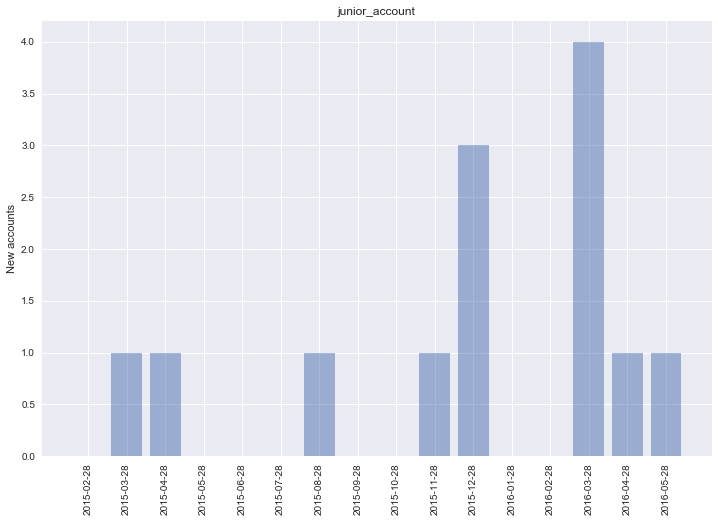

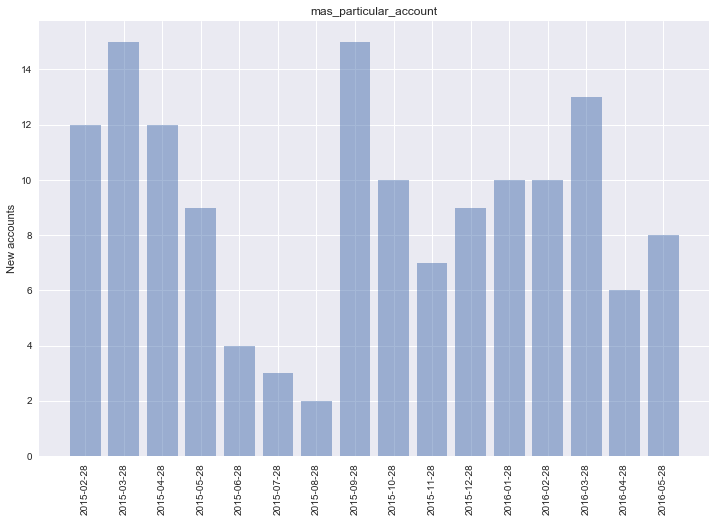

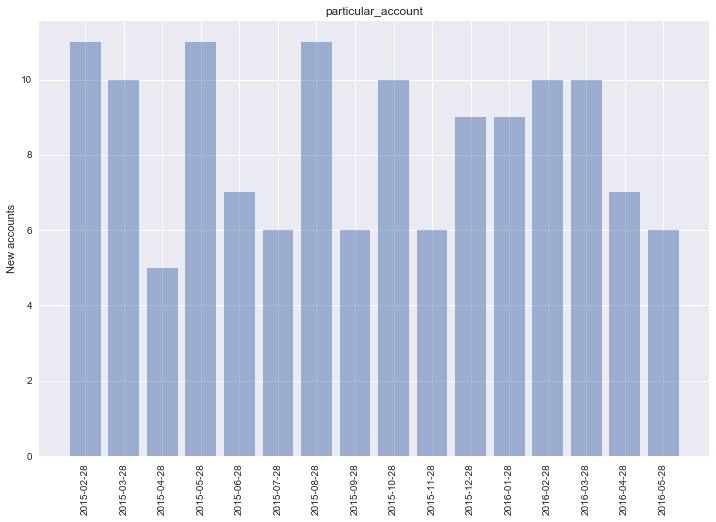

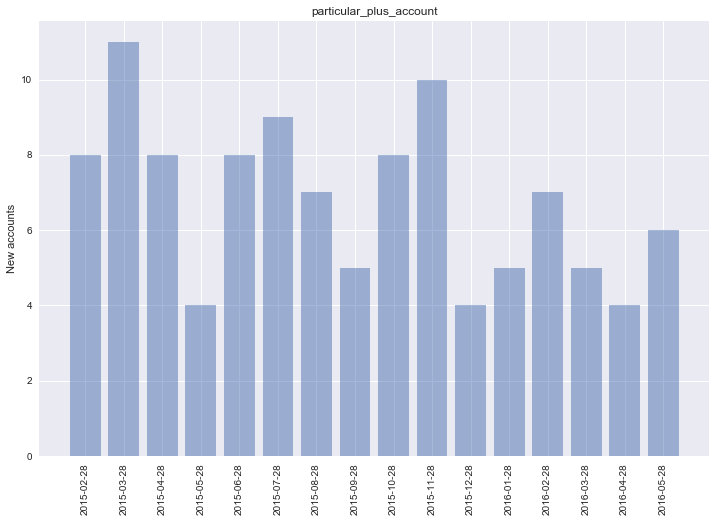

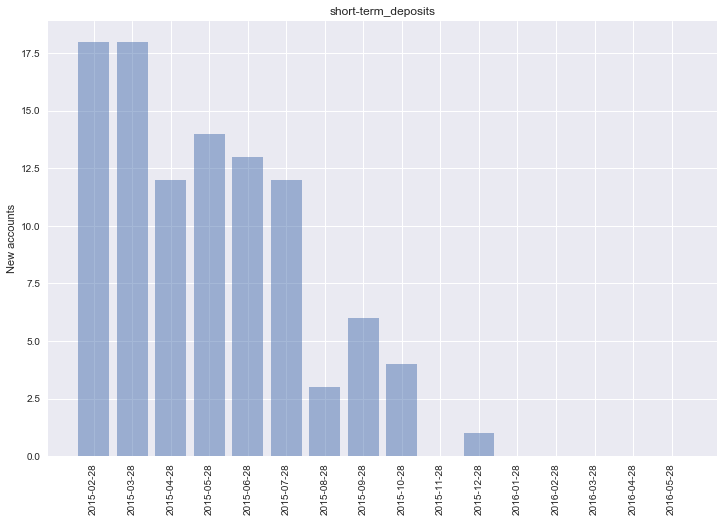

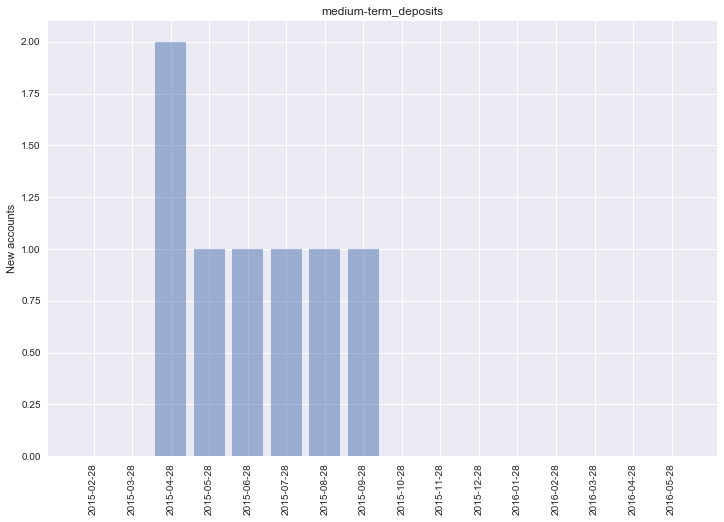

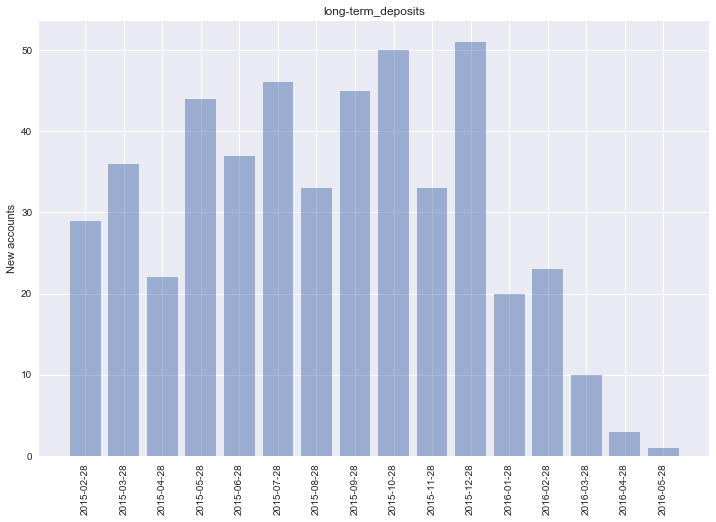

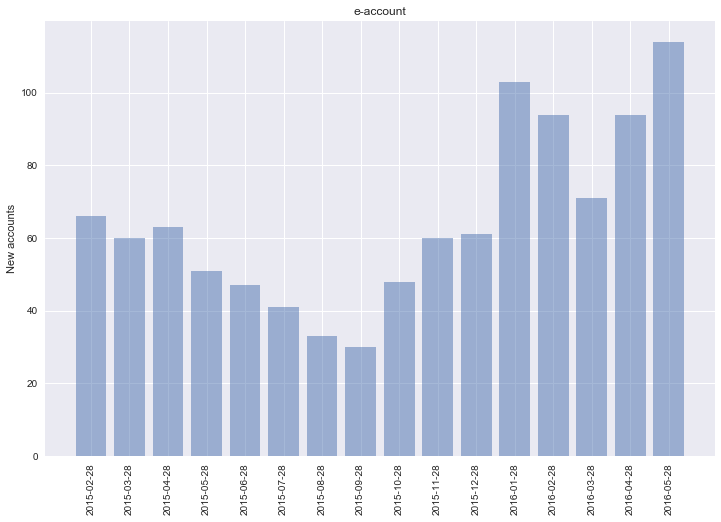

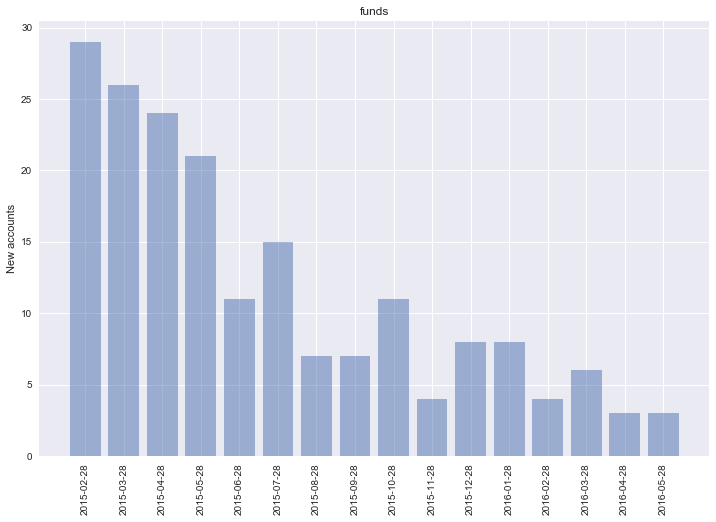

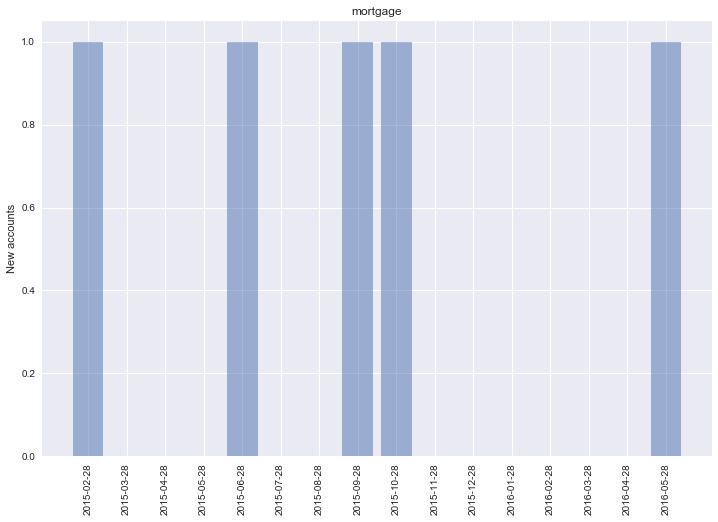

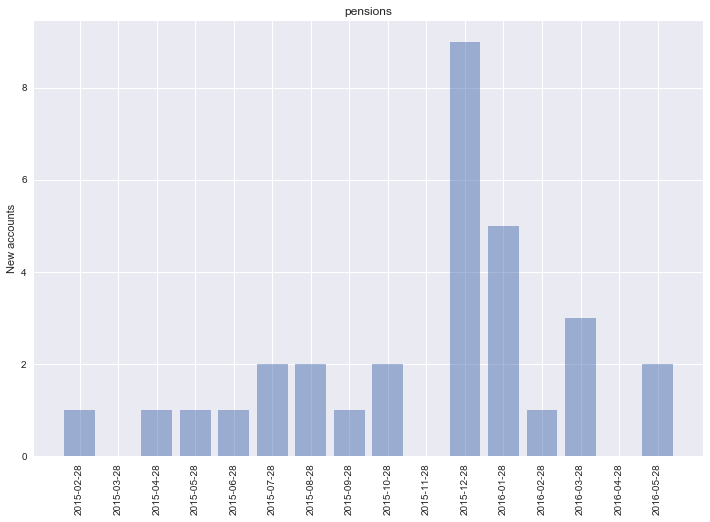

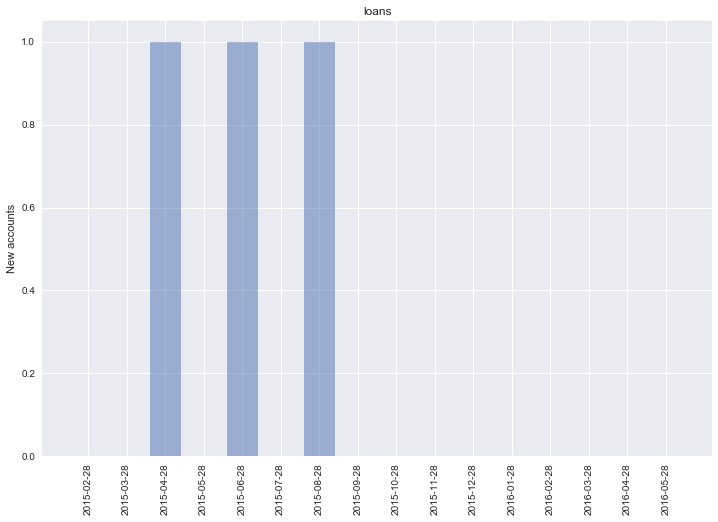

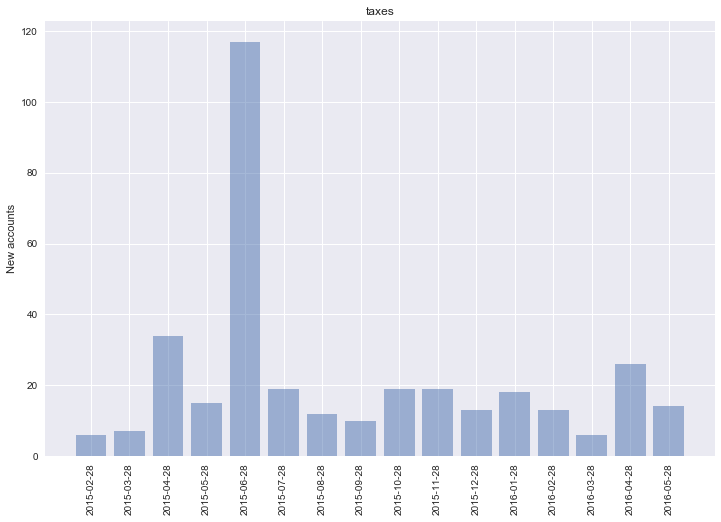

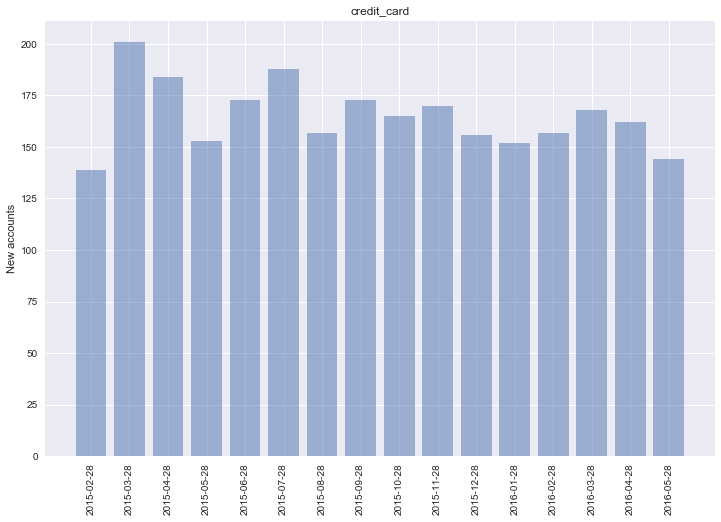

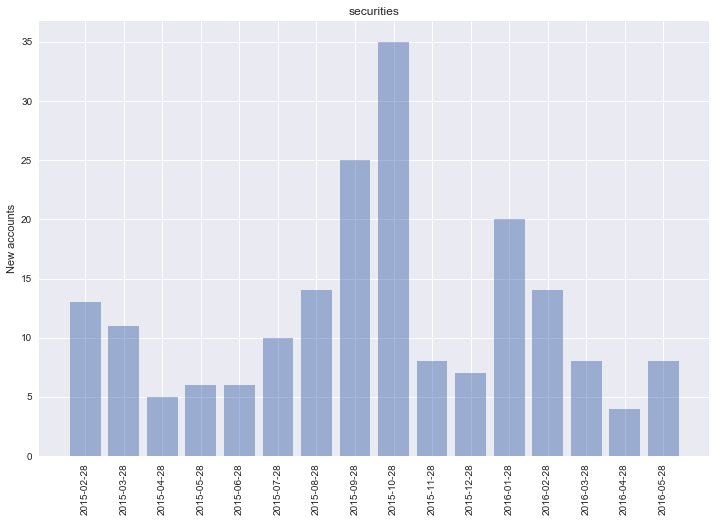

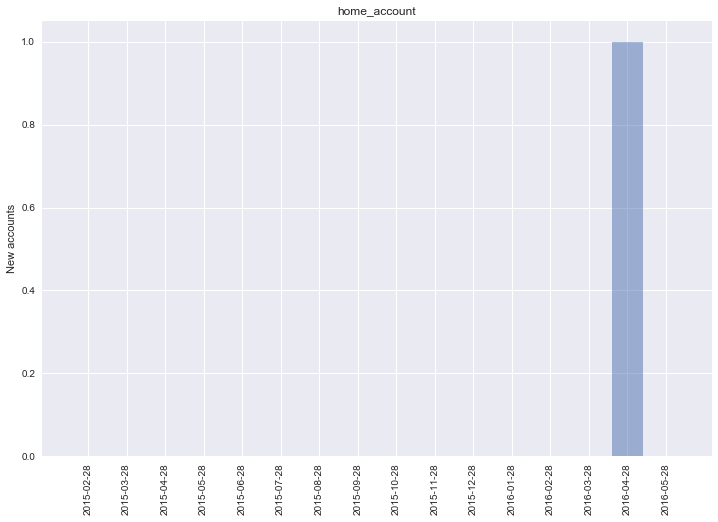

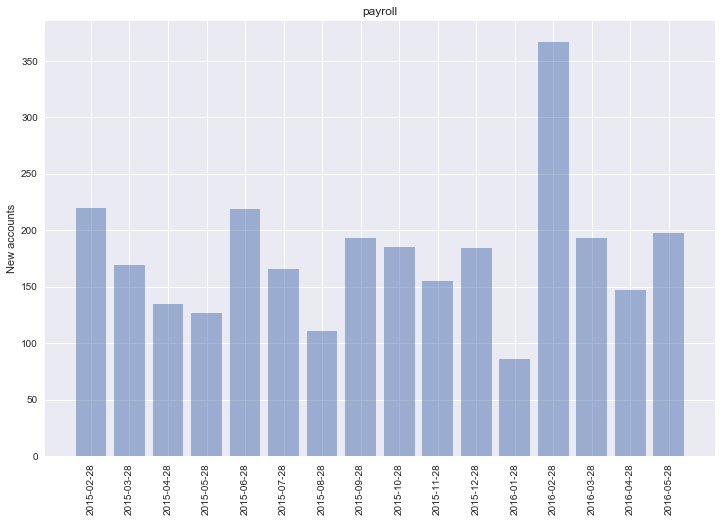

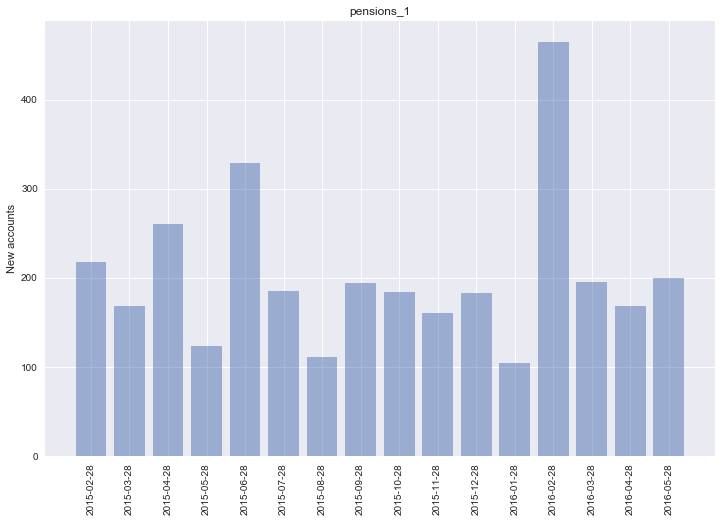

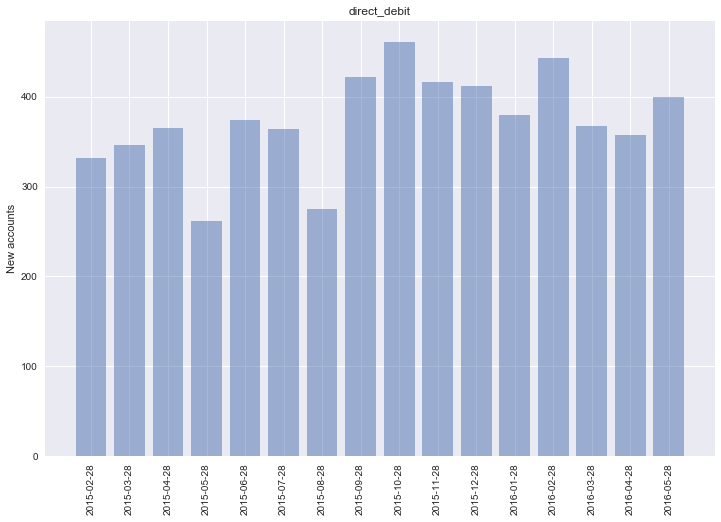

In [66]:
target_cols=["saving_account","guarantees","current_account","derivada_account","payroll_account","junior_account","mas_particular_account","particular_account","particular_plus_account","short-term_deposits","medium-term_deposits","long-term_deposits","e-account","funds","mortgage","pensions","loans","taxes","credit_card","securities","home_account","payroll","pensions_1","direct_debit"]
#target_cols=["current_account","derivada_account"]
alldates=['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28',
       '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28',
       '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28',
       '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28',
       '2016-05-28']
for prod in target_cols:
    new_accounts=[]
    for i in range(len(alldates)-1):
        #print alldates[i],alldates[i+1]
        df_tmp1 = df[ (df[prod]== 0) & (df['date']==alldates[i])]
        df_tmp2 = df[ (df[prod]== 1) & (df['date']==alldates[i+1])]
        new_accounts.append(len(set(df_tmp2['id']) & set(df_tmp1['id'])))

#df_tmp1 = df[ (df['current_account']== 0) & (df['date']=='2015-01-28')]

    y_pos = np.arange(len(alldates[1:]))

    plt.bar(y_pos, new_accounts, align='center', alpha=0.5)
    plt.xticks(y_pos, alldates[1:])
    plt.xticks(rotation='vertical')
    plt.ylabel('New accounts')
    plt.title(prod)
 
    plt.show()

#### There is a remarkable peak at 2015-06-28 for the taxes account. For the current account, we saw two peaks at 2015-06-28 and 2015-12-28. There is a increasing trend of new accounts for e-account and a decreasing trend for short-term deposits (no more new accounts in the year 2016).

In [51]:
df_tmp2 = df[ (df['current_account']== 1) & (df['date']=='2015-02-28')]

In [54]:
len(set(df_tmp2['id']) & set(df_tmp1['id']))

94

In [27]:
df[df['id']==917507]


,date,id,employee_index,country_residence,sex,age,first_join_date,new_customer_index,seniority,primary,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions_1,direct_debit
23512,2015-01-28,917507,N,ES,V,27.0,2011-07-07,0.0,48.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
230818,2015-02-28,917507,N,ES,V,27.0,2011-07-07,0.0,48.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
356177,2015-03-28,917507,N,ES,V,27.0,2011-07-07,0.0,48.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1596199,2015-11-28,917507,N,ES,V,27.0,2011-07-07,0.0,52.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2567922,2016-05-28,917507,N,ES,V,28.0,2011-07-07,0.0,58.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


#### Plot age distribution.

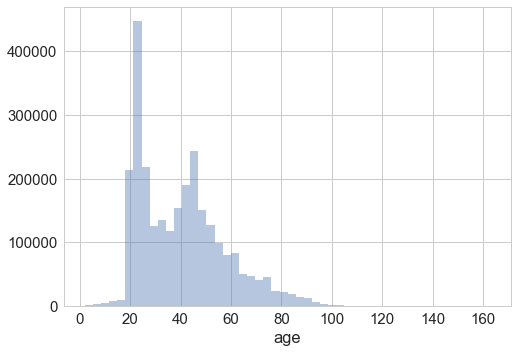

In [9]:
df['age']   = pd.to_numeric(df['age'], errors='coerce')
with sns.plotting_context('notebook',font_scale=1.5):
    sns.set_style('whitegrid')
    sns.distplot(df['age'].dropna(),
                 bins=50,
                 kde=False)

In [10]:
# codes in this cell takes forever to run. ???
# num_occur = df.groupby('id').agg('size').value_counts()

# plt.figure(figsize=(8,4))
# sns.barplot(num_occur.index, num_occur.values, alpha=0.8, color='b')
# plt.xlabel('Number of Occurrences of the customer', fontsize=12)
# plt.ylabel('Number of customers', fontsize=12)
# plt.show()

In [11]:
#num_occur


#### I would like to see with respect to date, the variation of total counts each product. Thus I groupby the "date", apply "sum" then make bar plots of total counts for every product with respect to date. 

In [12]:
df_sum = df.groupby('date',as_index=False).sum()
df_sum

,date,id,age,new_customer_index,seniority,primary,address,province_code,activity_idx,gross_income,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions_1,direct_debit
0,2015-01-28,96114154071,5007184.0,36.0,10341600.0,138447.0,123845.0,3281226.0,66658.0,1.379692e+10,...,1022,1526,400,7285,7072,4012,666,7684.0,8539.0,19140
1,2015-02-28,97016299281,5034530.0,557.0,10337690.0,142324.0,124488.0,3299023.0,67222.0,1.388059e+10,...,1021,1495,424,7463,6985,3940,662,8203.0,9035.0,19074
2,2015-03-28,97465843335,5042948.0,1125.0,10287146.0,139900.0,124514.0,3298678.0,67518.0,1.389148e+10,...,954,1435,411,7346,6832,3939,607,8465.0,8703.0,19298
3,2015-04-28,98042391808,5072203.0,1641.0,10330820.0,141152.0,125178.0,3317793.0,68244.0,1.392161e+10,...,1033,1471,415,7706,7218,4022,682,8465.0,9314.0,19731
4,2015-05-28,98783134613,5088870.0,2204.0,10323146.0,141908.0,125640.0,3332066.0,68936.0,1.409518e+10,...,957,1469,452,7597,7140,3870,596,8221.0,8429.0,19191
5,2015-06-28,99189152007,5085666.0,2696.0,10268992.0,139369.0,125747.0,3335018.0,69126.0,1.406130e+10,...,884,1441,430,8135,7454,3838,629,8542.0,9364.0,19621
6,2015-07-28,128418352789,6663247.0,3787.0,13181034.0,182193.0,162299.0,4288156.0,69862.0,1.817281e+10,...,901,1482,438,8332,7373,3975,648,8859.0,9774.0,19851
7,2015-08-28,134090901503,6782487.0,6665.0,13382859.0,185365.0,166549.0,4379097.0,71702.0,1.873322e+10,...,979,1483,380,8385,7418,3932,629,8555.0,9408.0,19243
8,2015-09-28,136934634200,6835527.0,8247.0,13500717.0,191618.0,168294.0,4436331.0,72688.0,1.875647e+10,...,943,1489,389,8285,7139,4102,598,8617.0,9441.0,19980
9,2015-10-28,143562868676,6993015.0,12124.0,13732357.0,197488.0,173184.0,4567288.0,74471.0,1.916671e+10,...,946,1531,440,8653,7179,4141,615,8931.0,9831.0,20920


#### bar plots of total counts for every product with respect to date.

[u'gross_income', u'saving_account', u'guarantees', u'current_account', u'derivada_account', u'payroll_account', u'junior_account', u'mas_particular_account', u'particular_account', u'particular_plus_account', u'short-term_deposits', u'medium-term_deposits', u'long-term_deposits', u'e-account', u'funds', u'mortgage', u'pensions', u'loans', u'taxes', u'credit_card', u'securities', u'home_account', u'payroll', u'pensions_1', u'direct_debit']


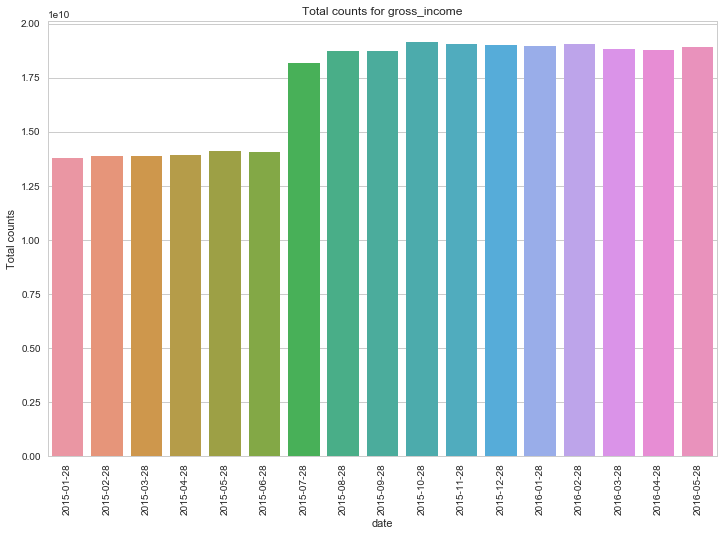

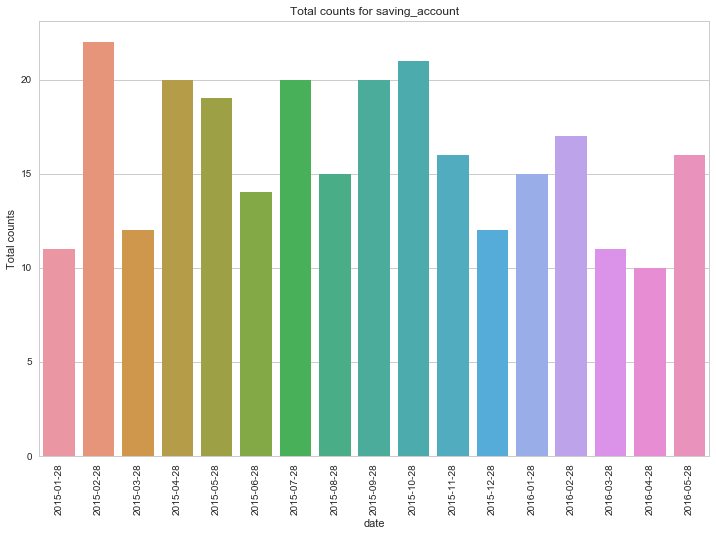

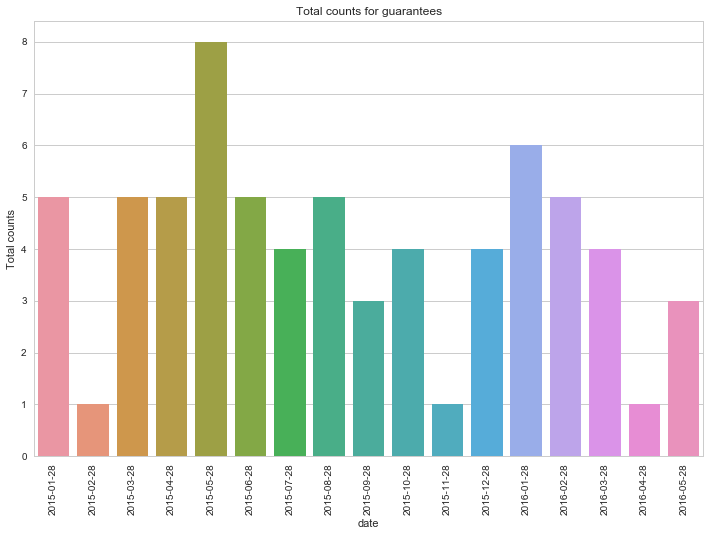

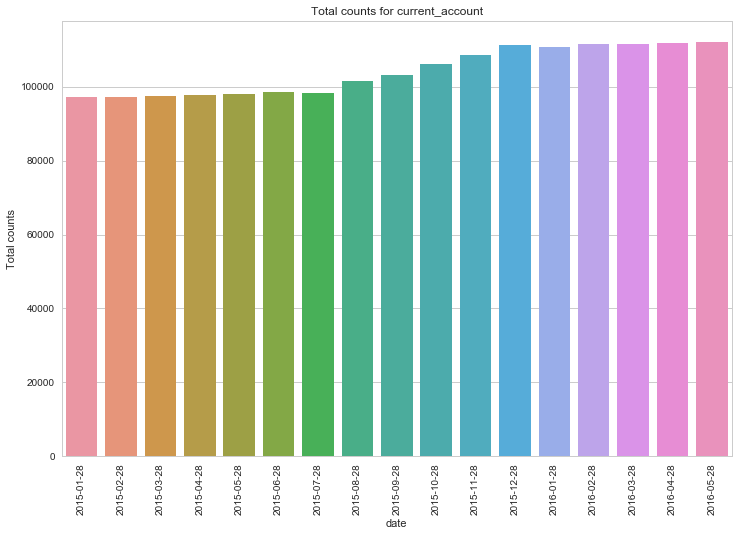

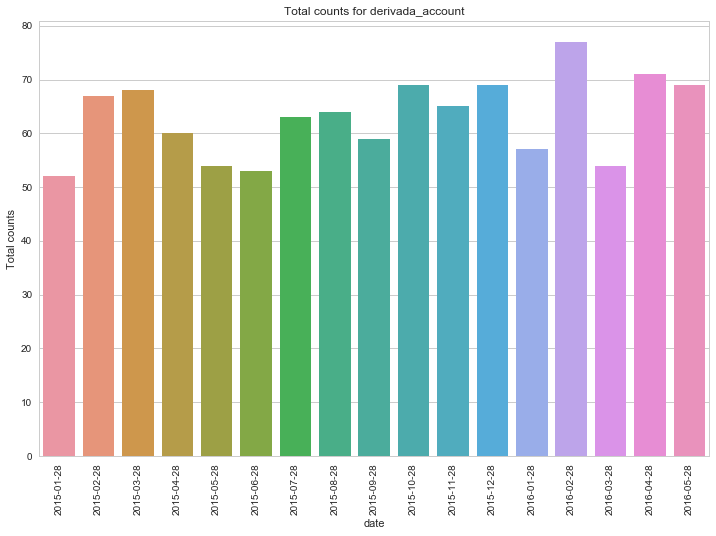

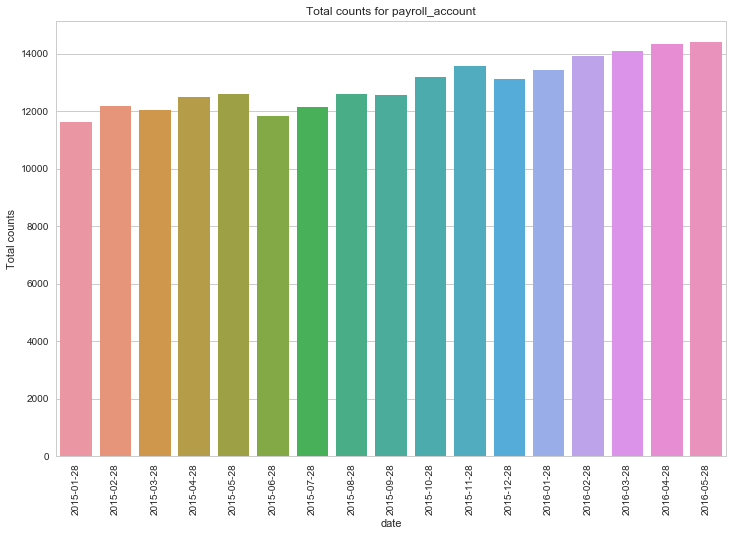

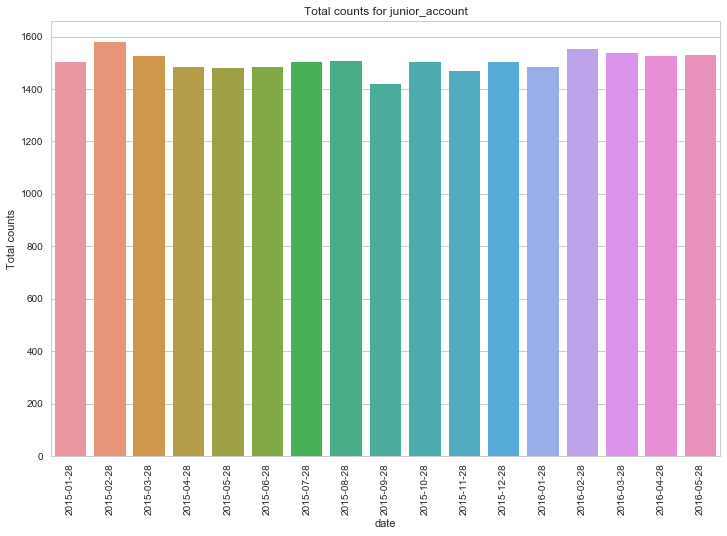

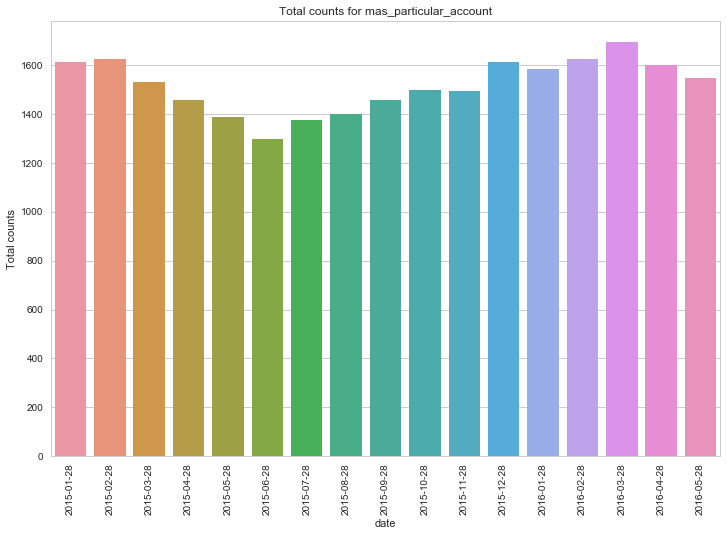

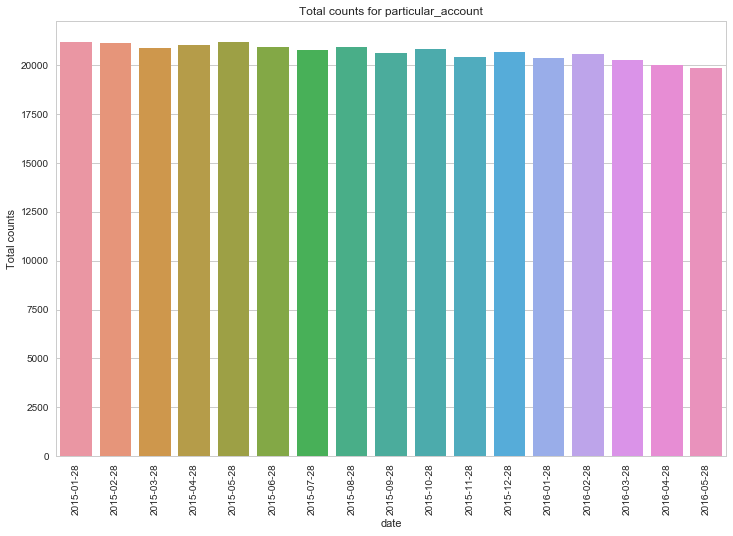

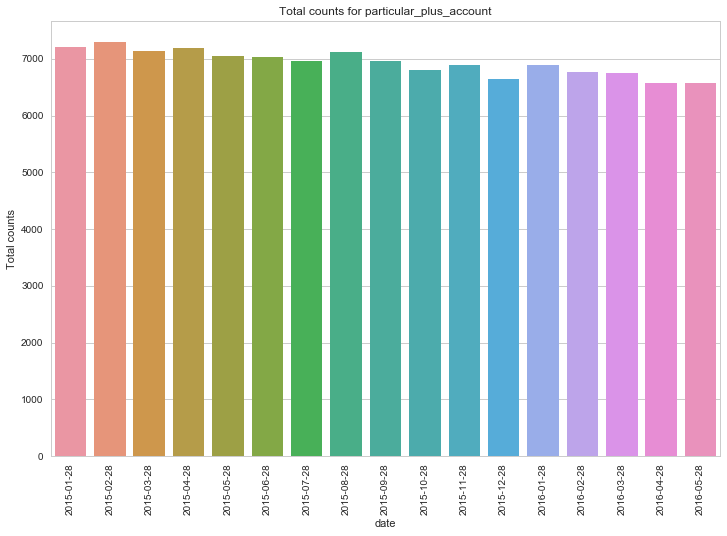

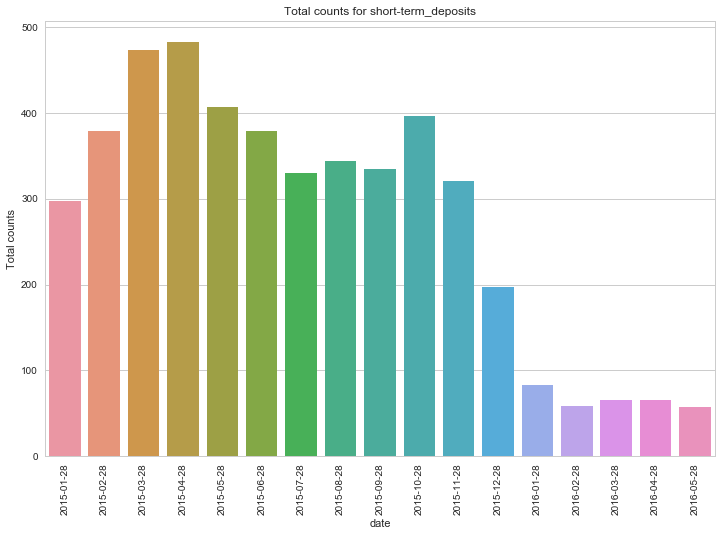

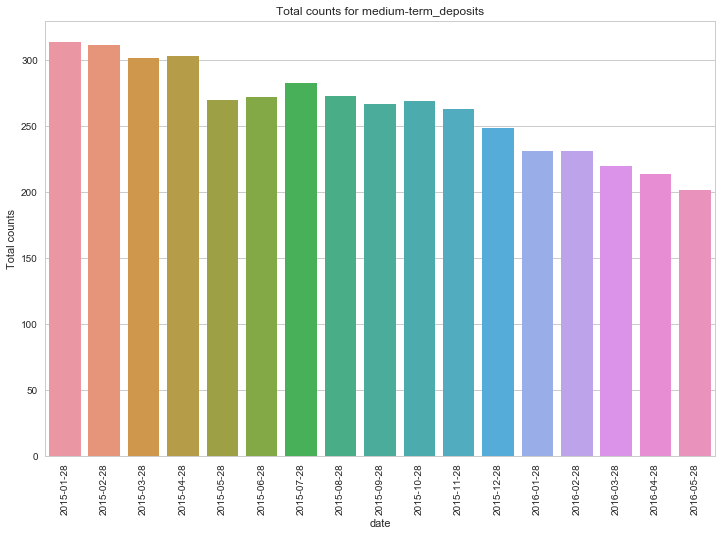

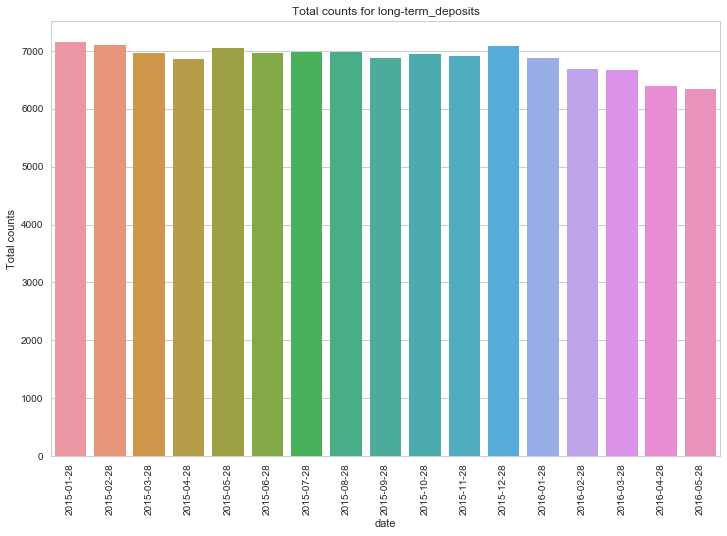

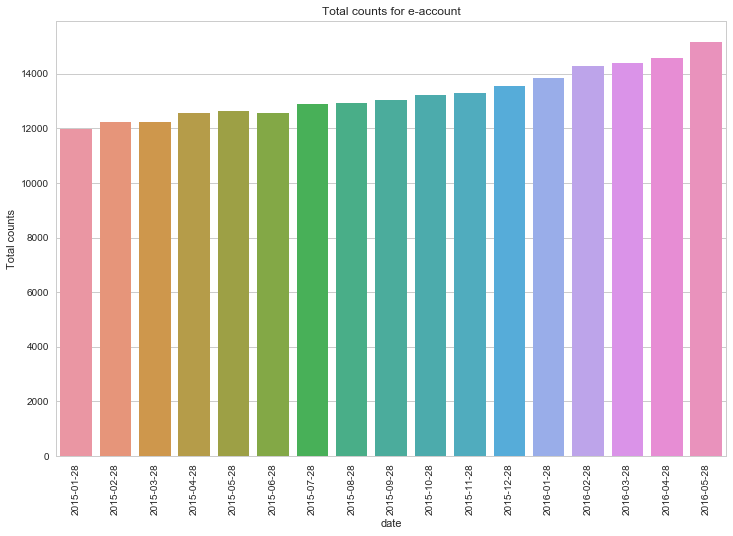

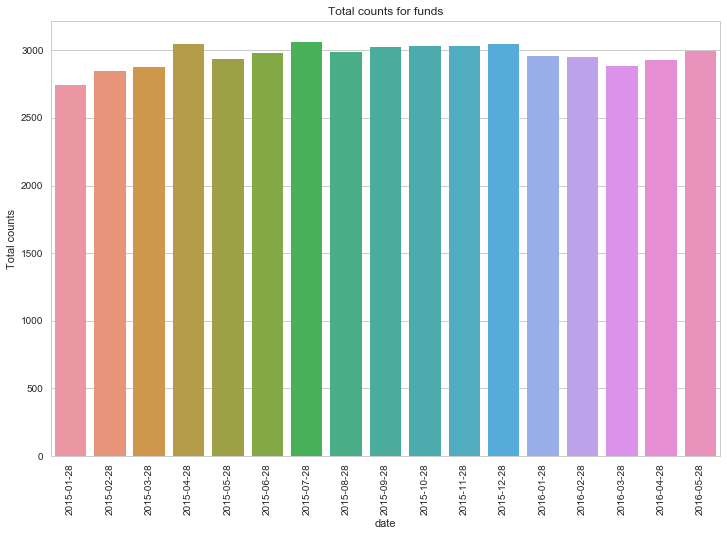

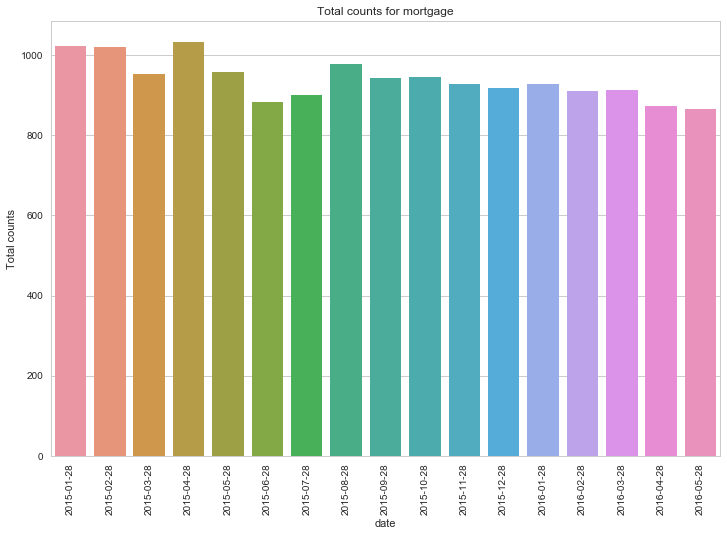

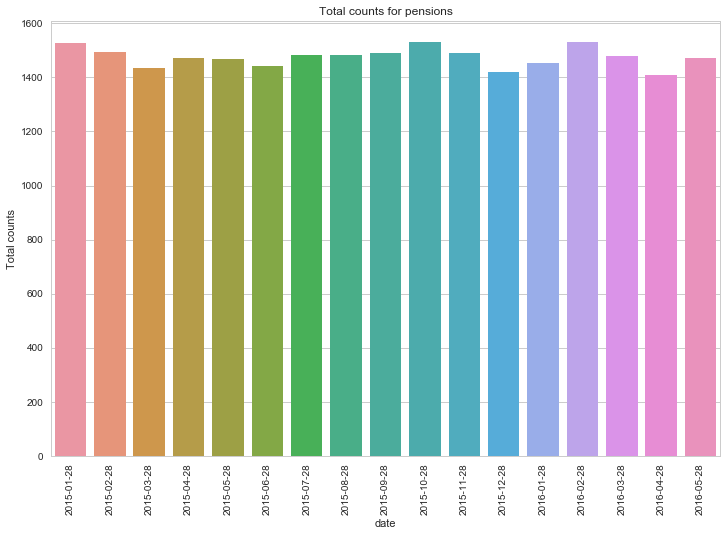

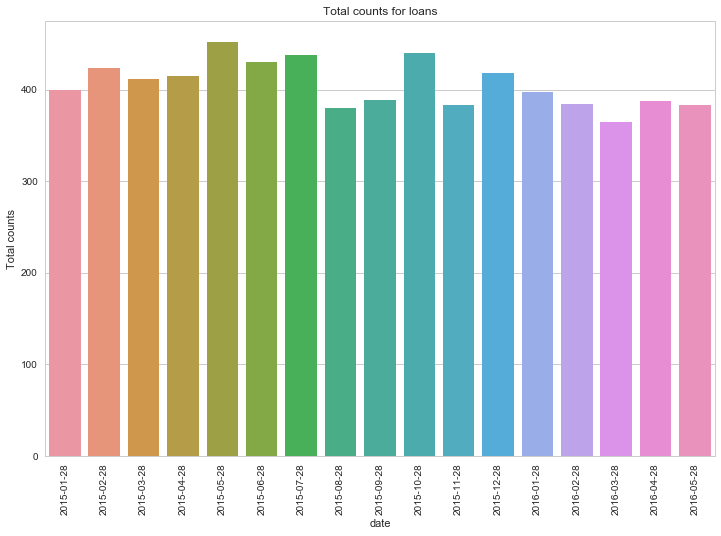

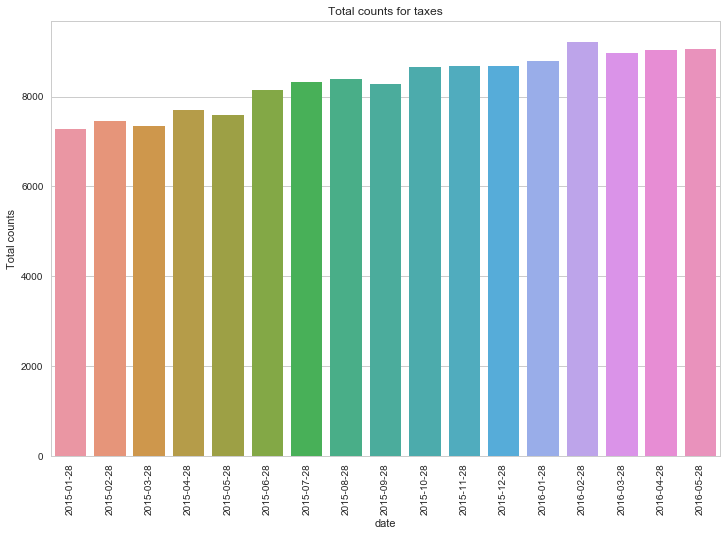

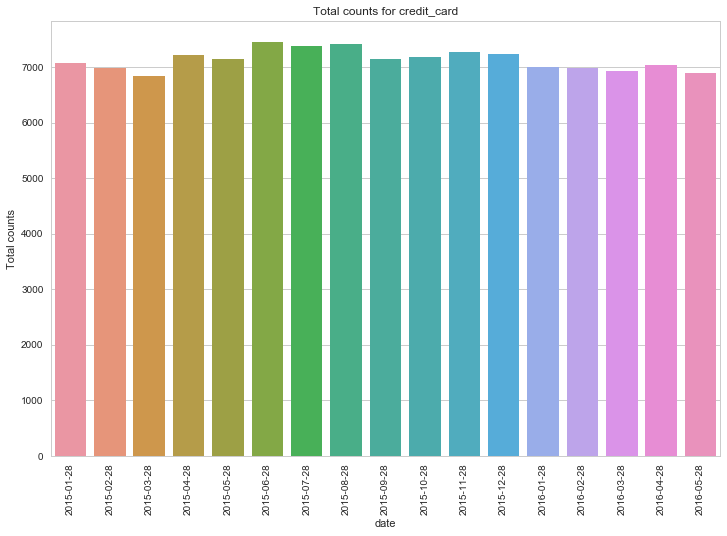

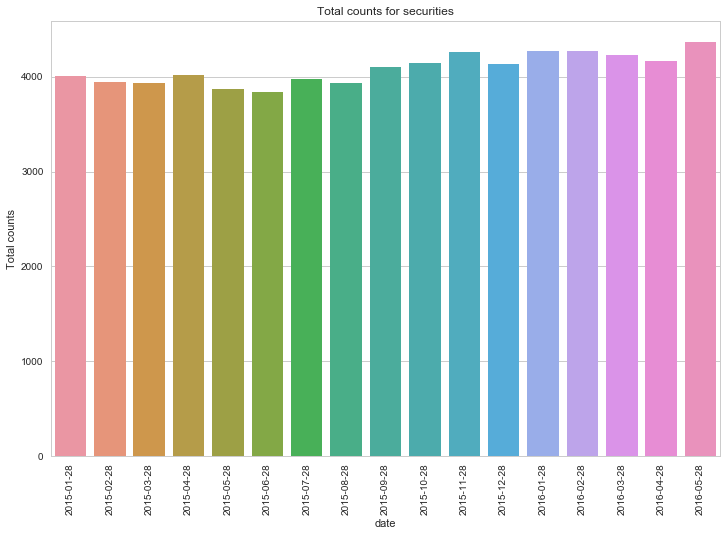

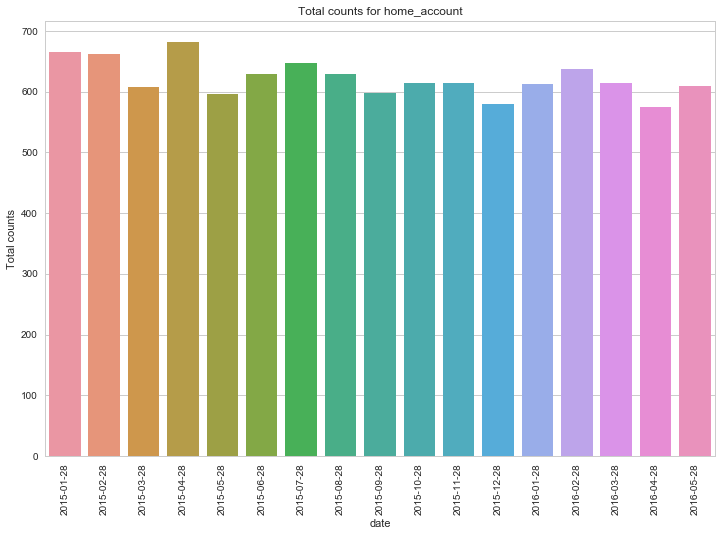

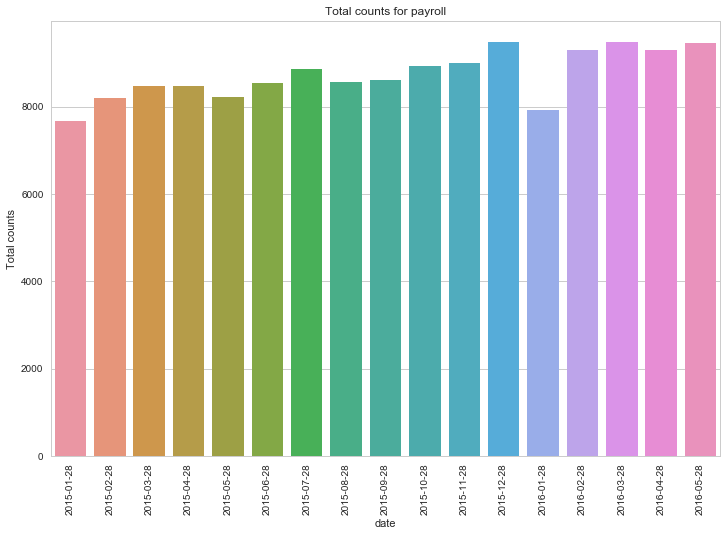

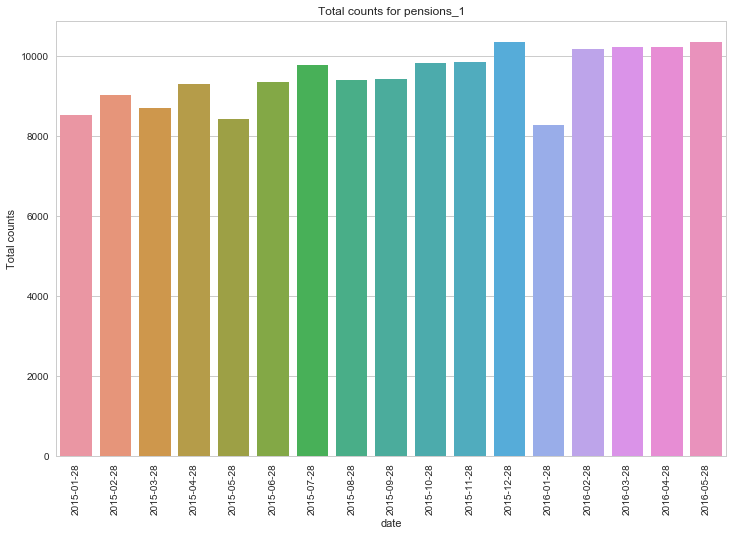

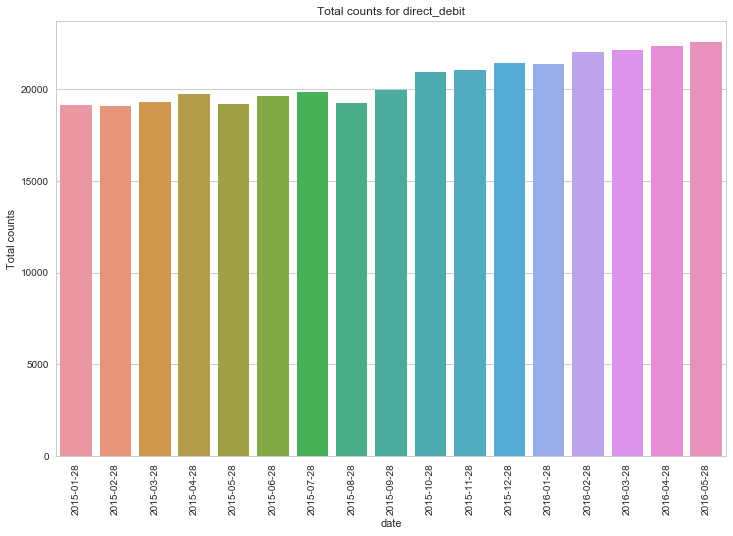

In [13]:
#df_sum
header = list(df_sum)
#for i in range (len(header)):
#    print(i,header[i])
print(header[9:])
for prod in header[9:]:
    sns.barplot(x="date", y=prod, data=df_sum)
    plt.xticks(rotation='vertical')
    plt.title('Total counts for '+ prod) 
    plt.ylabel('Total counts')
    plt.show()
# sns.barplot(x="product", y="total", data=df_bar1)
# plt.title('Percentage of product for gross income < 1 M')
# plt.ylabel('Percentage (%)')
# plt.xticks(rotation='vertical')
#df_bar

#### There is a trend that the number of saving account, short and medium-term deposit is decreasing and number of e-account is increasing.

#### Checking how many missing values in the data. 

In [14]:
df.isnull().sum()

date                            0
id                              0
employee_index                  0
country_residence               0
sex                            16
age                             0
first_join_date                 0
new_customer_index              0
seniority                       0
primary                         0
customer_type                  35
customer_relation              35
residence_idx                   0
foreigner_idx                   0
channel                      5076
deceased                        0
address                         0
province_code               13199
province_name               13199
activity_idx                    0
gross_income               533846
segment                      5902
saving_account                  0
guarantees                      0
current_account                 0
derivada_account                0
payroll_account                 0
junior_account                  0
mas_particular_account          0
particular_acc

#### Removing the records that are null.

In [15]:
#"isnull()" is a function that checks if something is NaN or empty. 
#The "~" (tilde) operator negates the following expression. 
#So we are saying give me a dataframe from your original dataframe but only where the 'data' rows are NOT null.
df = df[~df.isnull()]

In [16]:
df.isnull().sum()

date                            0
id                              0
employee_index                  0
country_residence               0
sex                            16
age                             0
first_join_date                 0
new_customer_index              0
seniority                       0
primary                         0
customer_type                  35
customer_relation              35
residence_idx                   0
foreigner_idx                   0
channel                      5076
deceased                        0
address                         0
province_code               13199
province_name               13199
activity_idx                    0
gross_income               533846
segment                      5902
saving_account                  0
guarantees                      0
current_account                 0
derivada_account                0
payroll_account                 0
junior_account                  0
mas_particular_account          0
particular_acc

#### Drop the row (axis=0) where any of the elements is nan.

In [17]:
df = df.dropna(axis=0)
df.head()
df.isnull().sum()

date                       0
id                         0
employee_index             0
country_residence          0
sex                        0
age                        0
first_join_date            0
new_customer_index         0
seniority                  0
primary                    0
customer_type              0
customer_relation          0
residence_idx              0
foreigner_idx              0
channel                    0
deceased                   0
address                    0
province_code              0
province_name              0
activity_idx               0
gross_income               0
segment                    0
saving_account             0
guarantees                 0
current_account            0
derivada_account           0
payroll_account            0
junior_account             0
mas_particular_account     0
particular_account         0
particular_plus_account    0
short-term_deposits        0
medium-term_deposits       0
long-term_deposits         0
e-account     

In [18]:
#### 

In [19]:
#df.loc[df.segment.notnull(),:]
#print column of mixed type
for i in [5,8,11,15]: 
    print(df.columns[i])

age
seniority
customer_relation
deceased


for field in ['age','seniority']:#,'customer_relation','deceased']:
    df[field]   = pd.to_numeric(df[field], errors='coerce')
    with sns.plotting_context('notebook',font_scale=1.5):
        sns.set_style('whitegrid')
        sns.distplot(df[df[field]>0].dropna(),
                     bins=50,
                     kde=False)
        sns.plt.show()

print(len(df))
small = str(0)
big = str(25000)
df = df.loc[df.renta.notnull(),:]


#print(len(df))
df = df[(df['renta'] > 0) & (df['renta'] < 25000)]


#sns.distplot(df['age'].dropna(),bins=100,kde=False)
sns.distplot(df['age'],kde=False)
#plt.xscale('log')
#sns.plt.title('Age Distribution for Gross Income between ' + small + ' and ' + big)
#sns.plt.title('Age Distribution for Gross Income between')

#plt.xlabel('Age')
#plt.ylabel('Count')
plt.show()
#plt.savefig('plots/age_'+small+'_'+big +'.png')


#### Plot seniority distribution.

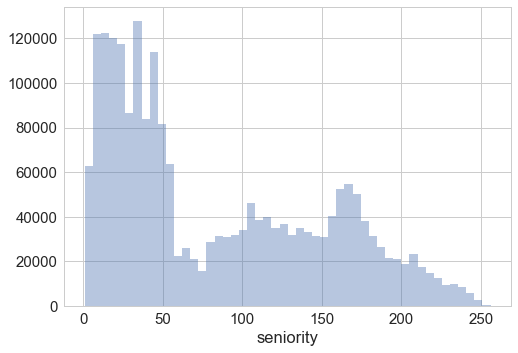

In [20]:
df['seniority']   = pd.to_numeric(df['seniority'], errors='coerce')
###train['antiguedad'] = train['antiguedad'].replace(to_replace=['     NA'], value=np.nan)
with sns.plotting_context('notebook',font_scale=1.5):
    sns.set_style('whitegrid')
    sns.distplot(df[df['seniority']>0]['seniority'].dropna(),
                 bins=50,
                 kde=False)

#### In this 20% training dataset, there is relatively large population for seniority less than 50.

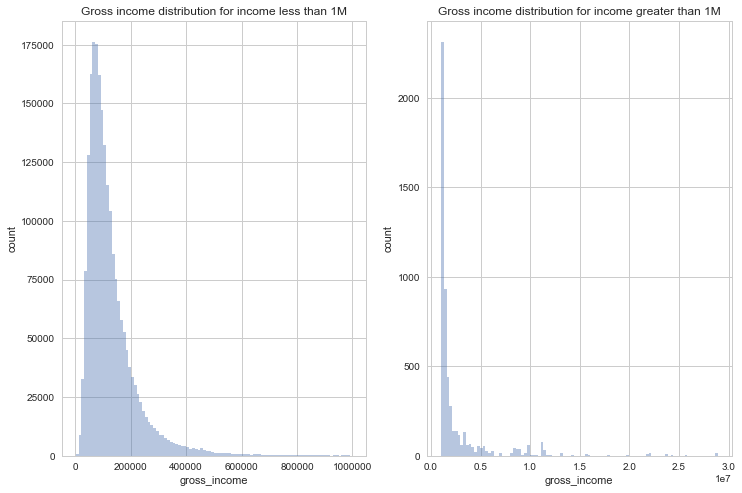

In [27]:

plt.subplot(1, 2, 1)
sns.distplot(df['gross_income'][(df['gross_income']>=0)&(df['gross_income']<1e6)].dropna(),
                 bins=100,
                 kde=False)
plt.title('Gross income distribution for income less than 1M')
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.distplot(df['gross_income'][(df['gross_income']>=0)&(df['gross_income']>1e6)].dropna(),
                 bins=100,
                 kde=False)
plt.title('Gross income distribution for income greater than 1M')
plt.ylabel('count')

plt.show()

#### The peak is around 100K for gross income < 1000K (1M). The peak is at the left-most end for gross income > 1M.

In [21]:
# with sns.plotting_context('notebook',font_scale=1.5):
#     sns.set_style('whitegrid')
#     sns.distplot(df['gross_income'][df['gross_income']>1e6].dropna(),
#                  bins=100,
#                  kde=False)
#     sns.plt.title('Very rich people gross income distribution')
#     sns.plt.ylabel('count')

[u'saving_account', u'guarantees', u'current_account', u'derivada_account', u'payroll_account', u'junior_account', u'mas_particular_account', u'particular_account', u'particular_plus_account', u'short-term_deposits', u'medium-term_deposits', u'long-term_deposits', u'e-account', u'funds', u'mortgage', u'pensions', u'loans', u'taxes', u'credit_card', u'securities', u'home_account', u'payroll', u'pensions_1', u'direct_debit']
saving_account                0.0
guarantees                    0.0
current_account            3184.0
derivada_account              1.0
payroll_account             528.0
junior_account               51.0
mas_particular_account       33.0
particular_account          871.0
particular_plus_account     346.0
short-term_deposits          11.0
medium-term_deposits          0.0
long-term_deposits          192.0
e-account                   453.0
funds                       106.0
mortgage                     23.0
pensions                     61.0
loans                        

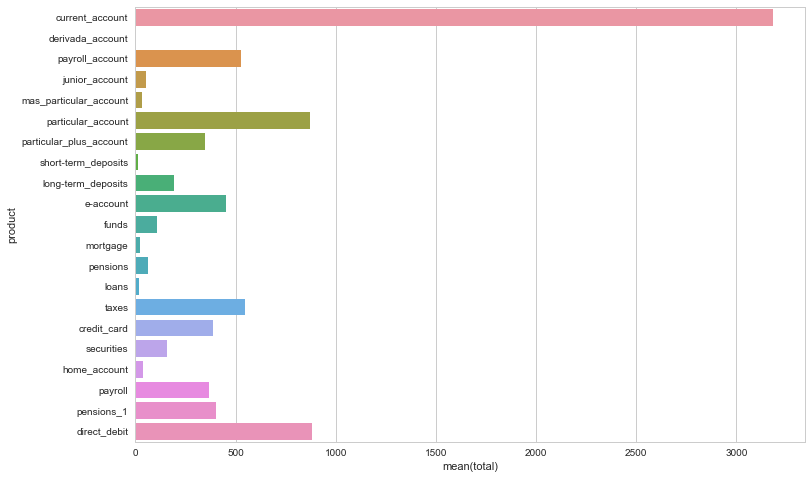

In [22]:
#study accounts very rich people have
header = list(df)
print(header[22:])
#df_prod = df[header[24:]]
df_sum = df[header[22:]][df['gross_income']>1e6].sum()
print(df_sum)
total_count = df_sum.tolist()
print(len(total_count))
bar_labels = [i for i in header[22:]]

total_count_dict = {'product': bar_labels,
                    'total' : total_count}

df_bar = pd.DataFrame.from_dict(total_count_dict)
df_bar = df_bar[df_bar['total']>0]
ax = sns.barplot(x="total", y="product", data=df_bar)


#study accounts for people with gross income < 1M
header = list(df)
print(header[22:])
df_sum = df[header[22:]][df['gross_income']<1e6].sum()
#print(df_sum)
totals = (df_sum.sum())

total_count = df_sum.tolist()
total_count = [total_count[i]/totals*100 for i in range(len(total_count))]
print(total_count)
bar_labels = [i for i in header[22:]]

total_count_dict = {'product': bar_labels,
                    'total' : total_count}

df_bar = pd.DataFrame.from_dict(total_count_dict)
#df_bar = df_bar[(df_bar['total']>500)&(df_bar['total']<1400000)]

ax = sns.barplot(x="total", y="product", data=df_bar).set_xlim(0,10)
sns.plt.title('Percentage of product for gross income < 1 M')

sns.plt.xlabel('Percentage (%)')


#study accounts very rich people have
header = list(df)
print(header[22:])
#df_prod = df[header[24:]]
df_sum = df[header[22:]][df['gross_income']>1e6].sum()
print(df_sum)
total_count = df_sum.tolist()
print(len(total_count))
bar_labels = [i for i in header[22:]]

total_count_dict = {'product': bar_labels,
                    'total' : total_count}

df_bar = pd.DataFrame.from_dict(total_count_dict)
df_bar = df_bar[(df_bar['total']>0)&(df_bar['total']<3000)]
ax = sns.barplot(x="total", y="product", data=df_bar)


In [23]:
#===calculate total counts of product
def product_sum(df_sum):
    totals = (df_sum.sum())

    total_count = df_sum.tolist()
    total_count = [total_count[i]/totals*100 for i in range(len(total_count))]
    #print(total_count)
    bar_labels = [i for i in header[22:]]

    total_count_dict = {'product': bar_labels,
                        'total' : total_count}

    df_bar = pd.DataFrame.from_dict(total_count_dict)
    return df_bar

In [24]:
#comparing accounts for people with gross income < 1M and > 1M
header = list(df)
print(header[22:])
df_sum1 = df[header[22:]][df['gross_income']<1e6].sum()
df_sum2 = df[header[22:]][df['gross_income']>1e6].sum()

df_bar1 = product_sum(df_sum1)
df_bar2 = product_sum(df_sum2)

df_bar1 = df_bar1.sort_values(by='total', ascending=0)
df_bar2 = df_bar2.sort_values(by='total', ascending=0)

print(df_bar1)

[u'saving_account', u'guarantees', u'current_account', u'derivada_account', u'payroll_account', u'junior_account', u'mas_particular_account', u'particular_account', u'particular_plus_account', u'short-term_deposits', u'medium-term_deposits', u'long-term_deposits', u'e-account', u'funds', u'mortgage', u'pensions', u'loans', u'taxes', u'credit_card', u'securities', u'home_account', u'payroll', u'pensions_1', u'direct_debit']
                    product      total
2           current_account  42.907340
7        particular_account   9.038321
23             direct_debit   9.030856
12                e-account   5.876223
4           payroll_account   5.758600
22               pensions_1   4.248228
21                  payroll   3.909167
17                    taxes   3.769513
18              credit_card   3.178364
8   particular_plus_account   3.069087
11       long-term_deposits   3.052093
19               securities   1.781305
13                    funds   1.303622
5            junior_account

#comparing accounts for people with gross income < 1M and > 1M

#ax = sns.barplot(x="total", y="product", data=df_bar).set_xlim(0,12)
#sns.plt.title('Percentage of product for gross income > 1 M')
#sns.plt.xlabel('Percentage (%)')

#f, (ax1, ax2) = plt.subplots(2,1)
#sns.barplot(x="product", y="total", data=df_bar1, ax= ax1)
#ax1.set_title('Percentage of product for gross income < 1 M')
#ax1.set_xlabel('Percentage (%)')
#plt.xticks(rotation='vertical')
#sns.barplot(x="product", y="total", data=df_bar2, ax= ax2) 
#ax2.set_title('Percentage of product for gross income > 1 M')
#ax2.set_xlabel('Percentage (%)')
#ax = plt.figure()
sns.barplot(x="product", y="total", data=df_bar1)
plt.title('Percentage of product for gross income < 1 M')
plt.ylabel('Percentage (%)')
plt.xticks(rotation='vertical')


#### Next, let's study what products people have the most. The accout distribution is expressed in percentage.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

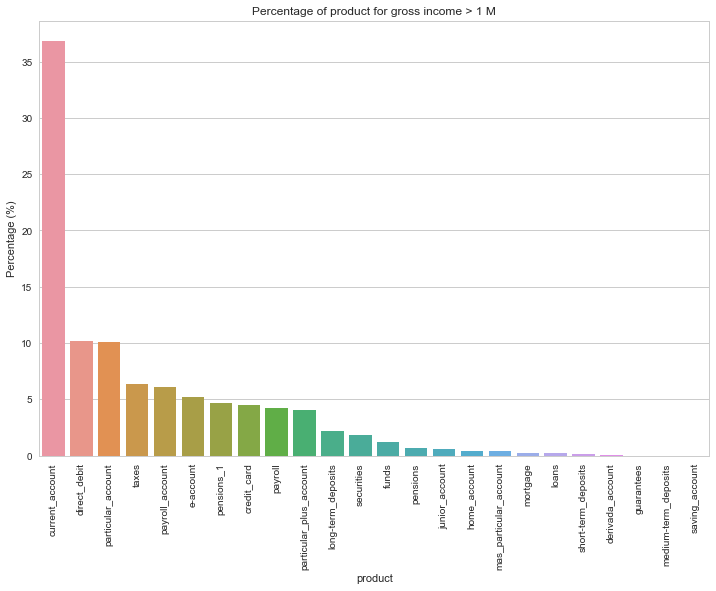

In [25]:
sns.barplot(x="product", y="total", data=df_bar2)
plt.title('Percentage of product for gross income > 1 M')
plt.ylabel('Percentage (%)')
plt.xticks(rotation='vertical')

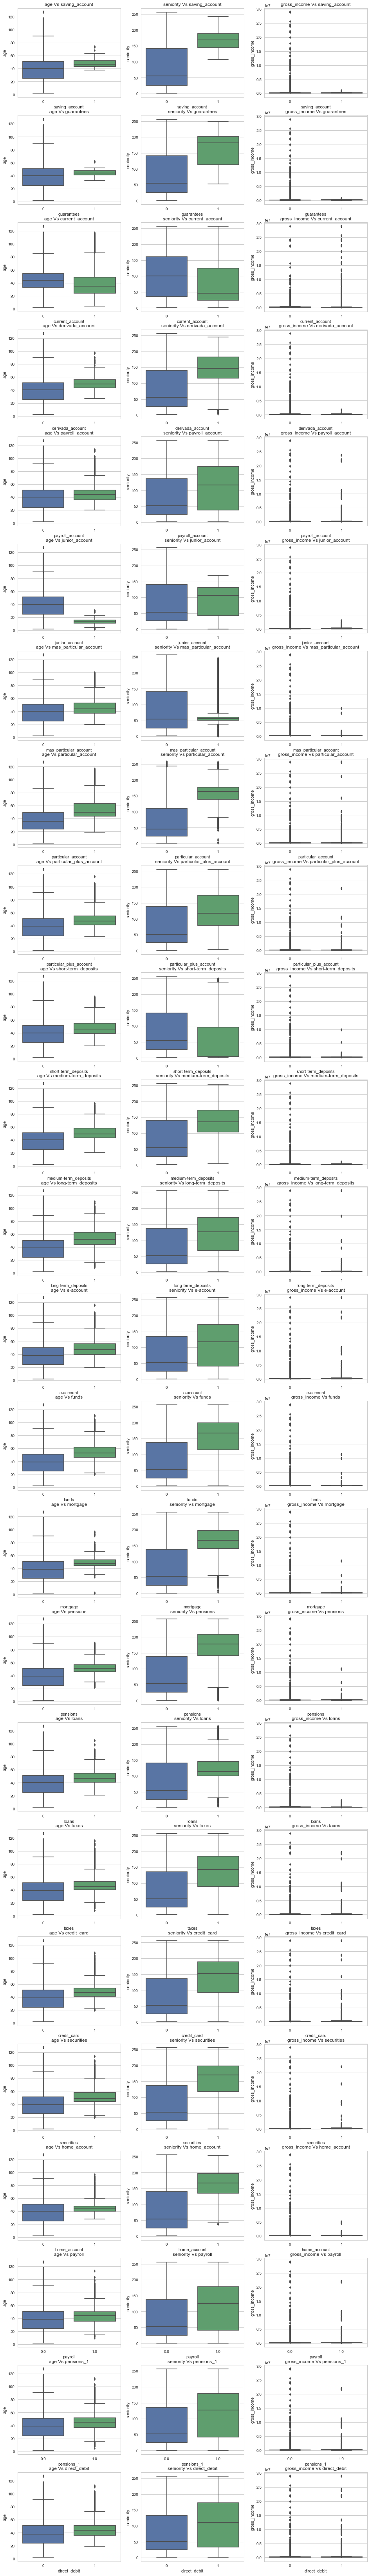

In [26]:
fig = plt.figure(figsize=(16, 120))
target_cols =['saving_account','guarantees', 'current_account', 'derivada_account', 'payroll_account',
       'junior_account', 'mas_particular_account', 'particular_account',
       'particular_plus_account', 'short-term_deposits',
       'medium-term_deposits', 'long-term_deposits', 'e-account', 'funds',
       'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities',
       'home_account', 'payroll', 'pensions_1', 'direct_debit']

numeric_cols = ['age', 'seniority', 'gross_income']
#for ind1, numeric_col in enumerate(numeric_cols):
plot_count = 0
for ind, target_col in enumerate(target_cols):
    for numeric_col in numeric_cols:
        plot_count += 1
        plt.subplot(24, 3, plot_count)
        sns.boxplot(x=target_col, y=numeric_col, data=df)
        plt.title(numeric_col+" Vs "+target_col)
plt.show()

#### We can see some differences between 0(without accounts) and 1(with accounts).